# Get sequences around MAPT hairpin with mutations and snps in them and get MFE structures and ensemble structures -> Use sequence we used DMS on

folder written to in tmp: BuildEnsembleFromMutationsSNPs_DMSProbed

This script will supply a fasta file with MAPT sequence that was probed by DMS. Replace the WT base at the site of mutation or common SNP with the different base. 
Write all the sequences into a fasta file

#### Using RNAsubopt using stochBT option

In [38]:
#mutationToWrite="rs116733906"
mutationToWrite="IncludingDMSdata"
#mutationToWrite="NoDMSdata"

In [39]:
# Read in 1000 suboptimal structures 
with open("../tmp/SuboptimalStructures_1000_MAPT_hairpin_LaederachPrimer_"+mutationToWrite+".txt") as f:
    wholefile = f.read().strip()   

In [40]:
# Split by sequences based on new line
splitByNewLine = wholefile.split("\n")
print(len(splitByNewLine))

1002


In [41]:
# Only grab lines that have . or ( or ) as the start character
splitByNewLine_OnlyDBs = [i for i in splitByNewLine if i[0] in [".","(",")"]]
print(len(splitByNewLine_OnlyDBs))

1000


In [42]:
# Only grab the first number of characters in the WT_seq 
onlyDBs = [i[0:wtseqLen] for i in splitByNewLine_OnlyDBs]
print(len(onlyDBs))

1000


In [43]:
# Only grab unique DBs
#DBs_unique = list(set(onlyDBs))
#print(len(DBs_unique))

In [44]:
# Write the suboptimal DB structures into a file
with open("../tmp/SuboptimalStructures_1000_MAPT_hairpin_LaederachPrimer_"+mutationToWrite+"_UniqueDBs.db","w") as fw:
    fw.write("\n".join(onlyDBs))
    fw.write("\n")

In [45]:
import pandas as pd

In [48]:
withDMS = pd.read_csv("../tmp/MAPT_hairpin_CoordsForLaederachPrimer_IncludeDMS_1000Iterations.txt",sep="\t",header=None)
withDMS.columns = ["withDMS_NoHairpin","withDMS_Hairpin"]
withDMS.head()

,withDMS_NoHairpin,withDMS_Hairpin
0,13,987
1,16,984
2,13,987
3,17,983
4,9,991


In [52]:
# Melt the data
withDMS_melted = withDMS.melt(value_vars=["withDMS_NoHairpin"])
withDMS_melted.columns = ["Sample","Number"]
withDMS_melted.head()

,Sample,Number
0,withDMS_NoHairpin,13
1,withDMS_NoHairpin,16
2,withDMS_NoHairpin,13
3,withDMS_NoHairpin,17
4,withDMS_NoHairpin,9


In [57]:
withoutDMS = pd.read_csv("../tmp/MAPT_hairpin_CoordsForLaederachPrimer_NoDMS_1000Iterations.txt",sep="\t",header=None)
withoutDMS.columns = ["withoutDMS_NoHairpin","withoutDMS_Hairpin"]
withoutDMS.head()

,withoutDMS_NoHairpin,withoutDMS_Hairpin
0,9,991
1,8,992
2,8,992
3,9,991
4,17,983


In [59]:
# Melt the data
withoutDMS_melted = withoutDMS.melt(value_vars=["withoutDMS_NoHairpin"])
withoutDMS_melted.columns = ["Sample","Number"]
withoutDMS_melted.head()

,Sample,Number
0,withoutDMS_NoHairpin,9
1,withoutDMS_NoHairpin,8
2,withoutDMS_NoHairpin,8
3,withoutDMS_NoHairpin,9
4,withoutDMS_NoHairpin,17


In [60]:
# Concatenate the two data frames
data = pd.concat([withDMS_melted,withoutDMS_melted])
data.tail()

,Sample,Number
995,withoutDMS_NoHairpin,9
996,withoutDMS_NoHairpin,8
997,withoutDMS_NoHairpin,13
998,withoutDMS_NoHairpin,16
999,withoutDMS_NoHairpin,7


In [61]:
# Load R GGplots
%load_ext rpy2.ipython
%R require(ggplot2)
%R require(reshape)

/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: reshape

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

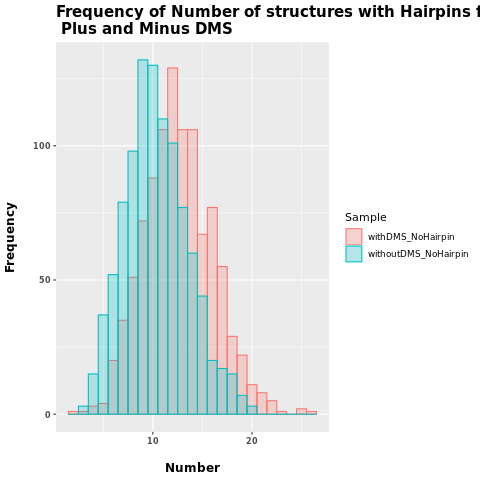

In [65]:
%%R -i data
p<- ggplot(data, aes(x=Number, fill=Sample, color=Sample)) +
  geom_histogram(alpha=0.25, binwidth=1,position="identity") +
    ggtitle("Frequency of Number of structures with Hairpins for\n Plus and Minus DMS") +
    xlab("\nNumber") +
    ylab("Frequency\n") +
    theme(axis.title.x=element_text(face="bold",size=12),axis.title.y=element_text(face="bold",size=12),
          axis.text.x = element_text(face="bold",size=8),axis.text.y = element_text(face="bold",size=8),
         plot.title = element_text(face="bold",size=15))
#filenameToSave = paste("../results/",folderName,"/GGplot2-FrequencyMAPQvalsPlusMinusDMS-",sampleName,".png",sep="")
#print(filenameToSave)
ggsave(p,file="../results/ensembleRNA_DMSvsNoDMS_MAPThairpin.png",width=8.1,height=5.6,dpi=300)
p